In [5]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [6]:
GE_years = [1988,1991,1997,2001,2006,2011,2015,2020]

total_seats_by_type=pd.DataFrame(columns = ['Constituency Type','Seats','Year'])


for year in GE_years:

    ## Set up dataframe
    file_path = 'Actual_results/'+ str(year)+'-Table 1.csv'
    df = pd.read_csv(file_path)

    # Remove empty rows and columns
    df = df.dropna(how='all').dropna(axis=1, how='all')


    df.columns = df.iloc[0]
    df = df[1:]

    # Reset the index
    df.reset_index(drop=True, inplace=True)
    df = df.dropna(subset = ['Seats'])

    df['Seats']=df['Seats'].astype(int)
    smc_seats = df[df['Seats'] == 1]['Seats'].sum()
    grc_seats = df[df['Seats'] != 1]['Seats'].sum()

    new_row = pd.DataFrame([{'Constituency Type': 'SMC', 'Seats' : smc_seats, 'Year': year}])
    total_seats_by_type = pd.concat([total_seats_by_type,new_row],ignore_index=True)

    new_row = pd.DataFrame([{'Constituency Type': 'GRC', 'Seats' : grc_seats, 'Year': year}])
    total_seats_by_type = pd.concat([total_seats_by_type,new_row],ignore_index=True)

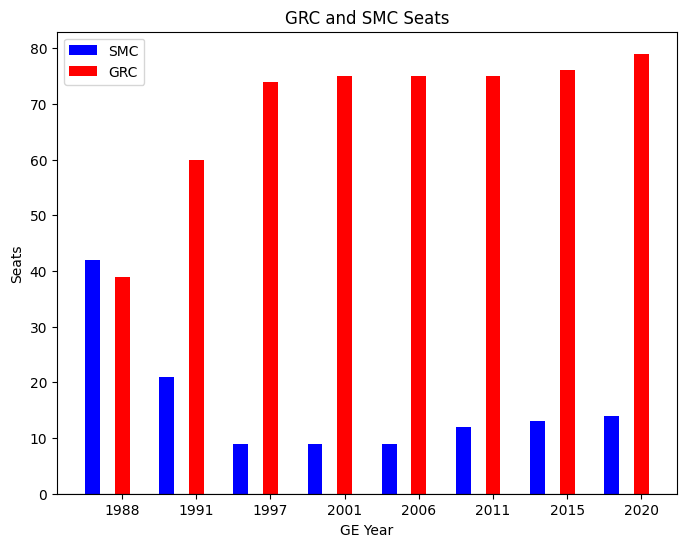

In [7]:
# Adjust the grouped bar chart to ensure matching data lengths
plt.figure(figsize=(8, 6))

# Define the width of each bar
bar_width = 0.20

# Filter data for each group
smc_data = total_seats_by_type[total_seats_by_type['Constituency Type'] == "SMC"]
grc_data = total_seats_by_type[total_seats_by_type['Constituency Type'] == "GRC"]


# Generate positions for the bars
years = sorted(total_seats_by_type['Year'].unique())
positions = {year: index for index, year in enumerate(years)}

# Adjust positions for each group

smc_positions = [positions[year] - bar_width for year in smc_data['Year']]
grc_positions = [positions[year] + bar_width for year in grc_data['Year']]


# Plotting bars for each party group with specified colors
plt.bar(smc_positions, smc_data['Seats'], color='blue', width=bar_width, label="SMC")
plt.bar(grc_positions, grc_data['Seats'], color='red', width=bar_width, label="GRC")


# Set the x-axis to show only the election years
plt.title('GRC and SMC Seats')
plt.xlabel('GE Year')
plt.ylabel('Seats')
plt.xticks(grc_positions, grc_data['Year'])  # Set positions for x-axis labels
plt.legend()
plt.grid(False)
plt.axhline(y=0, color='black', linewidth=0.8)  # Add the y=0 horizontal line
plt.show()


/var/folders/hh/2hqjsv5n2x974437l043sgfc0000gn/T/ipykernel_8110/1113681282.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_df = df.pivot(index='Year', columns='Constituency Type', values='Seats').fillna(0)


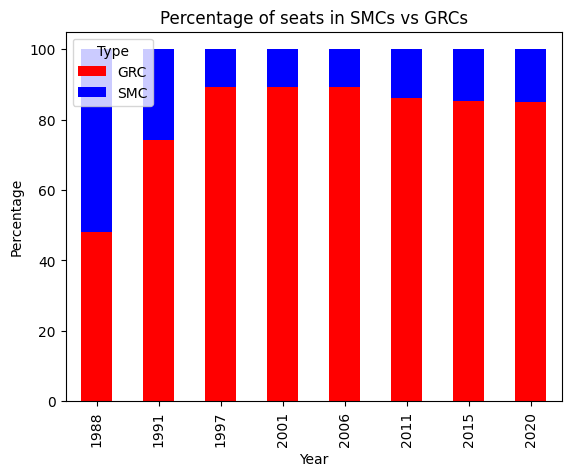

In [8]:
df = total_seats_by_type
pivot_df = df.pivot(index='Year', columns='Constituency Type', values='Seats').fillna(0)

# Calculate the percentages
pivot_df_perc = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

colors = {'GRC':'red','SMC':'blue'}

# Plot the percentage bar graph
pivot_df_perc.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df_perc.columns])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of seats in SMCs vs GRCs')
plt.legend(title='Type')
plt.show()